<a href="https://colab.research.google.com/github/Milikitty/DS2002F24/blob/main/SQLite_Hw_jhs5gq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import sqlite3

connection = sqlite3.connect('student_grades.db')
print("Database created and connected!")
cursor = connection.cursor()

Database created and connected!


In [13]:
cursor.execute('''
Create TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')
print("Table created!")

Table created!


In [14]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Table created!")

Table created!


In [15]:
cursor.execute('''
INSERT INTO students (first_name, last_name)
VALUES
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
''')

connection.commit()
print("Data inserted successfully!")

Data inserted successfully!


In [16]:
cursor.execute('''
INSERT INTO grades (student_id, student_id, subject, grade)
VALUES
    (1, 1, 'Math', 95),
    (2, 1, 'English', 88),
    (3, 1, 'History', 90),
    (4, 2, 'Math', 82),
    (5, 2, 'English', 76),
    (6, 2, 'History', 85),
    (7, 3, 'Math', 78),
    (8, 3, 'English', 92),
    (9, 3, 'History', 88),
    (10, 4, 'Math', 90),
    (11, 4, 'English', 85),
    (12, 4, 'History', 92),
    (13, 5, 'Math', 80),
    (14, 5, 'English', 75),
    (15, 5, 'History', 88)
''')

connection.commit()

print("Data inserted successfully!")






Data inserted successfully!


In [17]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

print("All students and their grades:")
for row in cursor.fetchall():
    print(row)

All students and their grades:
('Alice', 'Johnson', 'Math', 95)
('Bob', 'Smith', 'English', 88)
('Carol', 'White', 'History', 90)
('David', 'Brown', 'Math', 82)
('Eve', 'Davis', 'English', 76)


In [18]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

print("Average Grades:")
for row in cursor.fetchall():
    print(row)

Average Grades:
('Alice', 'Johnson', 95.0)
('Bob', 'Smith', 88.0)
('Carol', 'White', 90.0)
('David', 'Brown', 82.0)
('Eve', 'Davis', 76.0)


In [43]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade) IN (SELECT subject, MAX(grade) FROM grades GROUP BY subject)
ORDER BY grades.subject, grades.grade DESC
''')

print("Students with the highest grade in each subject:")
for row in cursor.fetchall():
    print(row)

Students with the highest grade in each subject:
('Alice', 'Johnson', 'Math', 95)


In [20]:
cursor.execute('''
SELECT AVG(grade) AS average_math_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE subject = 'Math'
GROUP BY students.student_id
ORDER BY AVG(grade) ASC
LIMIT 1
''')
print("Average Math Grade")
for row in cursor.fetchall():
    print(row)


Average Math Grade
(82.0,)


In [35]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade) IN (SELECT subject, MAX(grade) FROM grades GROUP ) > 90
''')

print("Students with grades over 90:")
for row in cursor.fetchall():
    print(row)

Students with grades over 90:
('Alice', 'Johnson', 'Math', 95)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
students_df = pd.read_sql_query("SELECT * FROM students", connection)
grades_df = pd.read_sql_query("SELECT * FROM grades", connection)
students_df.head()
grades_df.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,2,English,88
2,3,3,History,90
3,4,4,Math,82
4,5,5,English,76


In [25]:
combined_df = pd.merge(students_df, grades_df, on='student_id')
combined_df.head()

,student_id,first_name,last_name,grade_id,subject,grade
0,1,Alice,Johnson,1,Math,95
1,2,Bob,Smith,2,English,88
2,3,Carol,White,3,History,90
3,4,David,Brown,4,Math,82
4,5,Eve,Davis,5,English,76


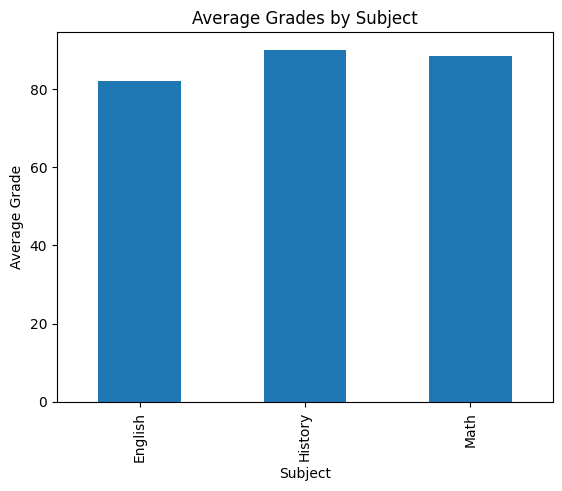

In [26]:
average_grades_plt = combined_df.groupby('subject')['grade'].mean()
average_grades_plt.plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades by Subject')
plt.show()
#

In [49]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade = (SELECT MAX(grade) FROM grades WHERE student_id = students.student_id)
''')

print("Students with the highest grade in each subject:")
for row in cursor.fetchall():
    print(row)

Students with the highest grade in each subject:
('Alice', 'Johnson', 'Math', 95)
('Bob', 'Smith', 'English', 88)
('Carol', 'White', 'History', 90)
('David', 'Brown', 'Math', 82)
('Eve', 'Davis', 'English', 76)


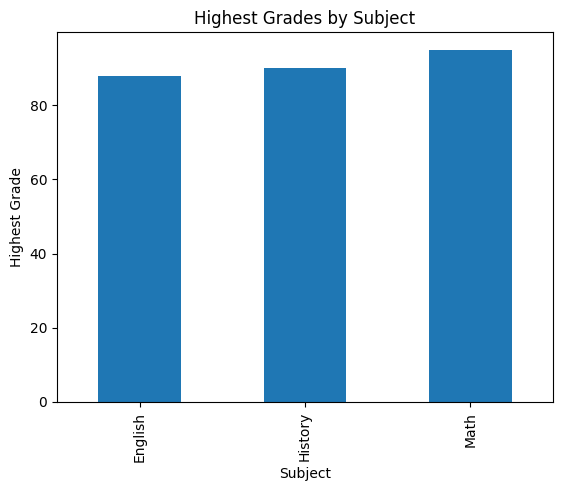

In [50]:
highest_grades_plt = combined_df.groupby('subject')['grade'].max()
highest_grades_plt.plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Highest Grade')
plt.title('Highest Grades by Subject')
plt.show()